In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing




# Stats Models
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit


In [2]:
df = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)



In [3]:
df.shape

(9134, 24)

In [4]:
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [5]:
df.columns = df.columns.str.replace(' ','_')
df.Response = df.Response.apply(lambda x : 0 if x == 'No' else 1)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24170f28>,
      dtype=object)

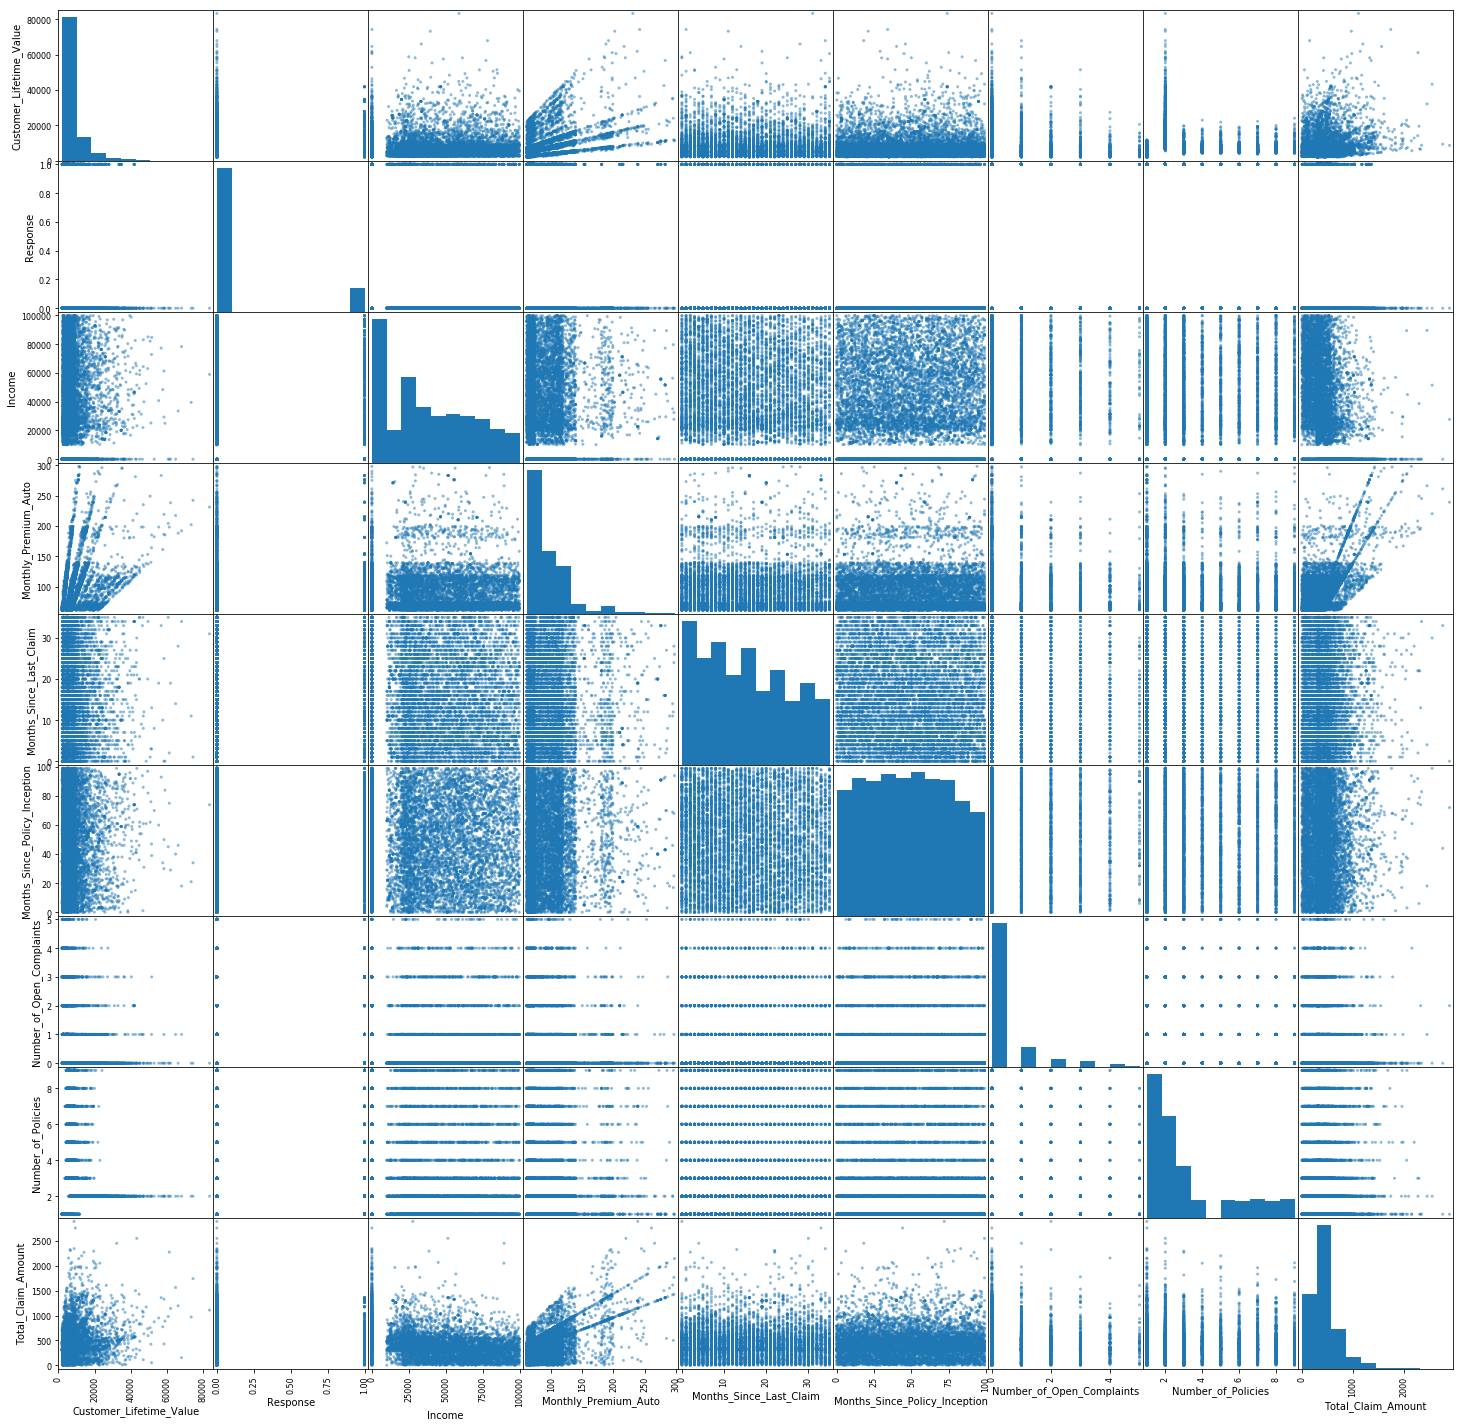

In [6]:
pd.plotting.scatter_matrix(df, figsize = (25,25))

Text(0, 0.5, 'Count')

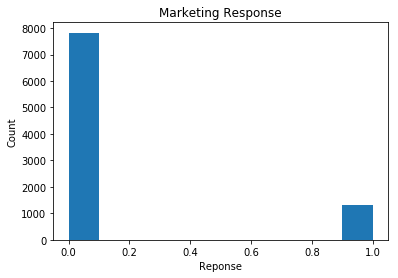

In [7]:
df.Response.hist(grid = False)
plt.title('Marketing Response')
plt.xlabel('Reponse')
plt.ylabel('Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2417d6a0>,
      dtype=object)

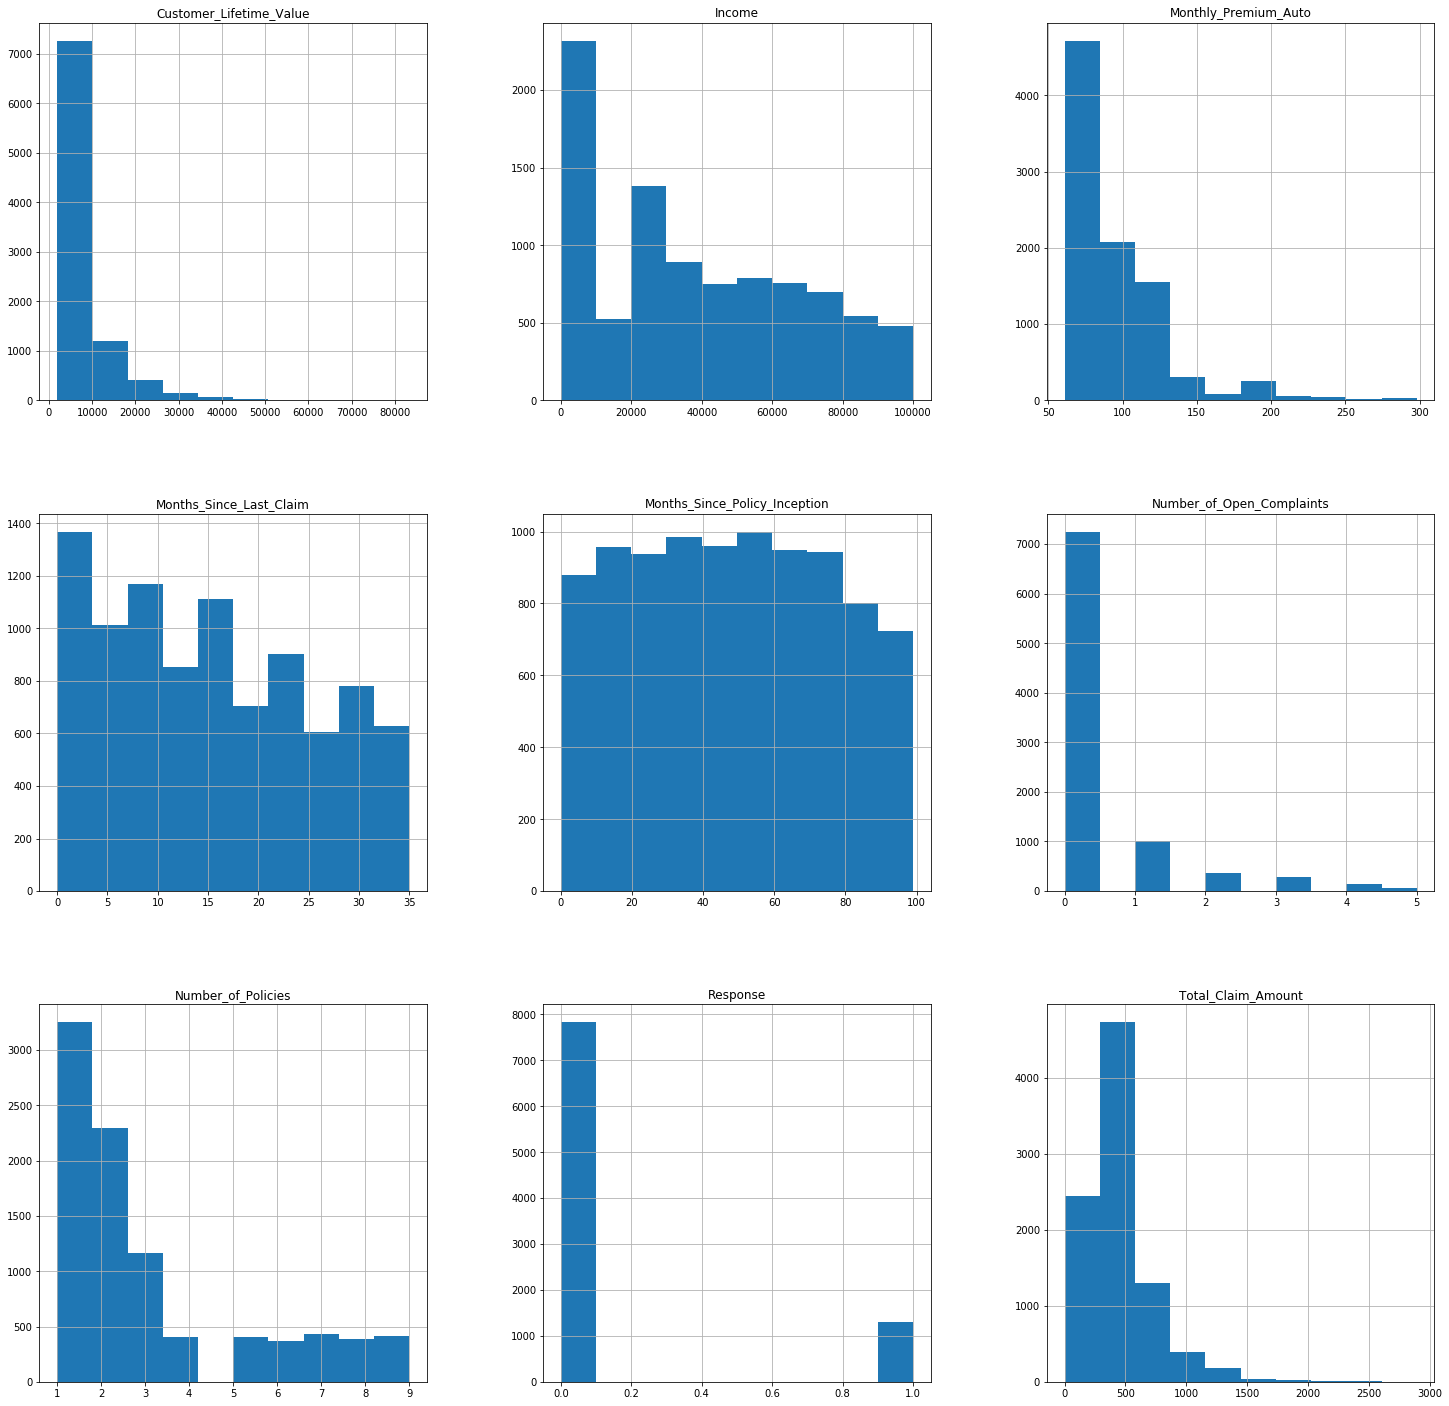

In [8]:
df.hist(figsize = (25,25))

total claim x customer lifetime value

total claim x monthly premium

lifetime value x monthly premium

monthly premium x total claim



In [9]:
df.describe()

Customer_Lifetime_Value     Response        Income  \
count              9134.000000  9134.000000   9134.000000   
mean               8004.940475     0.143201  37657.380009   
std                6870.967608     0.350297  30379.904734   
min                1898.007675     0.000000      0.000000   
25%                3994.251794     0.000000      0.000000   
50%                5780.182197     0.000000  33889.500000   
75%                8962.167041     0.000000  62320.000000   
max               83325.381190     1.000000  99981.000000   

       Monthly_Premium_Auto  Months_Since_Last_Claim  \
count           9134.000000              9134.000000   
mean              93.219291                15.097000   
std               34.407967                10.073257   
min               61.000000                 0.000000   
25%               68.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   

       Months_Since_Policy_Inception  Number_of_Open_Complaints  \
count                    9134.000000                9134.000000   
mean                       48.064594                   0.384388   
std                        27.905991                   0.910384   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   

       Number_of_Policies  Total_Claim_Amount  
count         9134.000000         9134.000000  
mean             2.966170          434.088794  
std              2.390182          290.500092  
min              1.000000            0.099007  
25%              1.000000          272.258244  
50%              2.000000          383.945434  
75%              4.000000          547.514839  
max              9.000000         2893.239678

In [10]:
df.describe(include = object)

Customer       State Coverage Education Effective_To_Date  \
count      9134        9134     9134      9134              9134   
unique     9134           5        3         5                59   
top     OZ58610  California    Basic  Bachelor           1/10/11   
freq          1        3150     5568      2748               195   

       EmploymentStatus Gender Location_Code Marital_Status    Policy_Type  \
count              9134   9134          9134           9134           9134   
unique                5      2             3              3              3   
top            Employed      F      Suburban        Married  Personal Auto   
freq               5698   4658          5779           5298           6788   

             Policy Renew_Offer_Type Sales_Channel  Vehicle_Class Vehicle_Size  
count          9134             9134          9134           9134         9134  
unique            9                4             4              6            3  
top     Personal L3           Offer1         Agent  Four-Door Car      Medsize  
freq           3426             3752          3477           4621         6424

In [11]:
df.corr()

Customer_Lifetime_Value  Response    Income  \
Customer_Lifetime_Value                       1.000000 -0.008930  0.024366   
Response                                     -0.008930  1.000000  0.011932   
Income                                        0.024366  0.011932  1.000000   
Monthly_Premium_Auto                          0.396262  0.010966 -0.016665   
Months_Since_Last_Claim                       0.011517 -0.016597 -0.026715   
Months_Since_Policy_Inception                 0.009418  0.002952 -0.000875   
Number_of_Open_Complaints                    -0.036343 -0.009881  0.006408   
Number_of_Policies                            0.021955 -0.020891 -0.008656   
Total_Claim_Amount                            0.226451  0.016877 -0.355254   

                               Monthly_Premium_Auto  Months_Since_Last_Claim  \
Customer_Lifetime_Value                    0.396262                 0.011517   
Response                                   0.010966                -0.016597   
Income                                    -0.016665                -0.026715   
Monthly_Premium_Auto                       1.000000                 0.005026   
Months_Since_Last_Claim                    0.005026                 1.000000   
Months_Since_Policy_Inception              0.020257                -0.042959   
Number_of_Open_Complaints                 -0.013122                 0.005354   
Number_of_Policies                        -0.011233                 0.009136   
Total_Claim_Amount                         0.632017                 0.007563   

                               Months_Since_Policy_Inception  \
Customer_Lifetime_Value                             0.009418   
Response                                            0.002952   
Income                                             -0.000875   
Monthly_Premium_Auto                                0.020257   
Months_Since_Last_Claim                            -0.042959   
Months_Since_Policy_Inception                       1.000000   
Number_of_Open_Complaints                          -0.001158   
Number_of_Policies                                 -0.013333   
Total_Claim_Amount                                  0.003335   

                               Number_of_Open_Complaints  Number_of_Policies  \
Customer_Lifetime_Value                        -0.036343            0.021955   
Response                                       -0.009881           -0.020891   
Income                                          0.006408           -0.008656   
Monthly_Premium_Auto                           -0.013122           -0.011233   
Months_Since_Last_Claim                         0.005354            0.009136   
Months_Since_Policy_Inception                  -0.001158           -0.013333   
Number_of_Open_Complaints                       1.000000            0.001498   
Number_of_Policies                              0.001498            1.000000   
Total_Claim_Amount                             -0.014241           -0.002354   

                               Total_Claim_Amount  
Customer_Lifetime_Value                  0.226451  
Response                                 0.016877  
Income                                  -0.355254  
Monthly_Premium_Auto                     0.632017  
Months_Since_Last_Claim                  0.007563  
Months_Since_Policy_Inception            0.003335  
Number_of_Open_Complaints               -0.014241  
Number_of_Policies                      -0.002354  
Total_Claim_Amount                       1.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer_Lifetime_Value          9134 non-null float64
Response                         9134 non-null int64
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective_To_Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies               9

In [13]:
df.head()

Customer       State  Customer_Lifetime_Value  Response  Coverage Education  \
0  BU79786  Washington              2763.519279         0     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903         0  Extended  Bachelor   
2  AI49188      Nevada             12887.431650         0   Premium  Bachelor   
3  WW63253  California              7645.861827         0     Basic  Bachelor   
4  HB64268  Washington              2813.692575         0     Basic  Bachelor   

  Effective_To_Date EmploymentStatus Gender  Income Location_Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital_Status  Monthly_Premium_Auto  Months_Since_Last_Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months_Since_Policy_Inception  Number_of_Open_Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number_of_Policies     Policy_Type        Policy Renew_Offer_Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales_Channel  Total_Claim_Amount  Vehicle_Class Vehicle_Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [14]:
df['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [15]:
by_offer_vh_class = df.loc[df.Response == "Yes"].groupby(["Renew_Offer_Type","Vehicle_Class"])["Customer"].count()
print(by_offer_vh_class)

Series([], Name: Customer, dtype: int64)


/Users/Gary/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [16]:
vh_class_by_offer = (by_offer_vh_class/df.groupby(['Renew_Offer_Type'])['Customer'].count()).unstack().fillna(0)
vh_class_by_offer

Empty DataFrame
Columns: []
Index: []

Do number of complaints affect lifetime value?
Do number of policies affect lifetime value?
What do these higher correlations mean?




**Possible Predictions**

Predict Customer Lifetime Value (Linear Regression)
Plot complaints by ltv
plot number of policies by ltv
LTV by policy type

Predict Claim Amount (Linear Regression)


Predict Yes or No for Marketing Response (Logistic Regression)


# Predicting Customer Lifetime Value

In [6]:
df1 = df.drop(['Customer', 'State', 'Effective_To_Date'], axis = 1)
df1 = pd.get_dummies(df1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 59 columns):
Customer_Lifetime_Value           9134 non-null float64
Response                          9134 non-null int64
Income                            9134 non-null int64
Monthly_Premium_Auto              9134 non-null int64
Months_Since_Last_Claim           9134 non-null int64
Months_Since_Policy_Inception     9134 non-null int64
Number_of_Open_Complaints         9134 non-null int64
Number_of_Policies                9134 non-null int64
Total_Claim_Amount                9134 non-null float64
Coverage_Basic                    9134 non-null uint8
Coverage_Extended                 9134 non-null uint8
Coverage_Premium                  9134 non-null uint8
Education_Bachelor                9134 non-null uint8
Education_College                 9134 non-null uint8
Education_Doctor                  9134 non-null uint8
Education_High School or Below    9134 non-null uint8
Education_Master         

In [8]:
y = df1['Customer_Lifetime_Value']
X = df1.drop('Customer_Lifetime_Value', axis = 1)


def run_model(model,X_train,X_test,y_train,y_test):
    
    print('Training R^2 :',model.score(X_train,y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :',model.score(X_test,y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)#create train test split



In [10]:
linreg = LinearRegression()
linreg.fit(X_train ,y_train)
run_model(linreg,X_train ,X_test ,y_train,y_test)

Training R^2 : 0.17218266729298348
Training Root Mean Square Error 6056.4698374906775

----------------

Testing R^2 : 0.1509936088208278
Testing Root Mean Square Error 6884.519018553863


In [11]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)
transformed_training_features = scaler.transform(X_train)
transformed_testing_features = scaler.transform(X_test)

X_train_transformed = pd.DataFrame(transformed_training_features, columns=X_train.columns, index=X_train.index)

X_test_transformed = pd.DataFrame(transformed_testing_features, columns=X_train.columns, index=X_test.index)

linreg = LinearRegression()
linreg.fit(X_train_transformed ,y_train)
run_model(linreg,X_train_transformed ,X_test_transformed ,y_train,y_test)

Training R^2 : 0.17190519911735547
Training Root Mean Square Error 6057.484757556948

----------------

Testing R^2 : 0.15129628425390196
Testing Root Mean Square Error 6883.291724772865


In [12]:
from sklearn.linear_model import RidgeCV

# perform 100k iterations and performs cross validation to find ideal alpha
ridge=RidgeCV(cv=5)
ridge.fit(X_train_transformed,y_train)
run_model(ridge,X_train_transformed,X_test_transformed,y_train,y_test)

Training R^2 : 0.17217661725312527
Training Root Mean Square Error 6056.491969074253

----------------

Testing R^2 : 0.1510601246690091
Testing Root Mean Square Error 6884.249327656284


In [13]:
from sklearn.linear_model import LassoCV
# perform 100k iterations and performs cross validation to find ideal alpha
lasso=LassoCV(max_iter=100000,cv=5)
lasso.fit(X_train_transformed,y_train)
run_model(lasso,X_train_transformed,X_test_transformed,y_train,y_test)

Training R^2 : 0.16976107562218512
Training Root Mean Square Error 6065.321782396028

----------------

Testing R^2 : 0.15514625211318678
Testing Root Mean Square Error 6867.66166847608


Text(0.5, 1.0, 'Actual vs Predicted Customer LTV ')

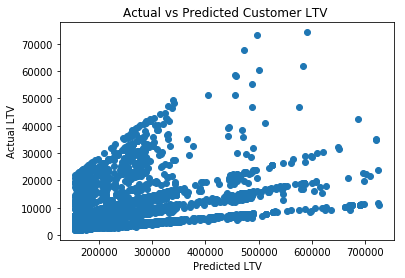

In [15]:
pred = lasso.predict(X_train)


plt.scatter(pred, y_train)
plt.xlabel('Predicted LTV')
plt.ylabel('Actual LTV')
plt.title('Actual vs Predicted Customer LTV ')



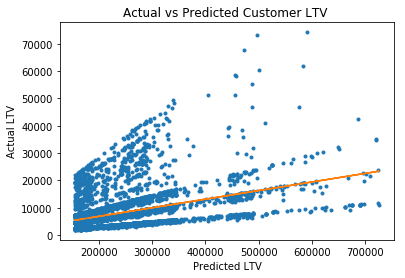

In [21]:
b, m = polyfit(pred, y_train, 1)
plt.plot(pred, y_train, '.')
plt.plot(pred, b + m * pred, '-')
plt.xlabel('Predicted LTV')
plt.ylabel('Actual LTV')
plt.title('Actual vs Predicted Customer LTV ')
plt.show()

**Seemed to have hit a wall here, cannot perform a polynomial transformation, because of the numer of columns from dummy variables. 16% r2 seems to be the best score.**


# Try a Label Encoder Approach to Categorical Variables


In [25]:
df2 = df.drop(['Customer','Effective_To_Date'], axis = 1)

cat_var = df2.select_dtypes(include='object')

cols = cat_var.columns

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in df2[cols]:
    df2[col] = lb.fit_transform(df2[col])

In [26]:
df2.head(100)

State  Customer_Lifetime_Value  Response  Coverage  Education  \
0       4              2763.519279         0         0          0   
1       0              6979.535903         0         1          0   
2       2             12887.431650         0         2          0   
3       1              7645.861827         0         0          0   
4       4              2813.692575         0         0          0   
5       3              8256.297800         1         0          0   
6       3              5380.898636         1         0          1   
7       0              7216.100311         0         2          4   
8       3             24127.504020         1         0          0   
9       3              7388.178085         0         1          1   
10      1              4738.992022         0         0          1   
11      1              8197.197078         0         0          1   
12      1              8798.797003         0         2          4   
13      0              8819.018934         1         0          3   
14      1              5384.431665         0         0          1   
15      3              7463.139377         0         0          0   
16      2              2566.867823         0         0          3   
17      1              3945.241604         0         0          1   
18      3              5710.333115         0         0          1   
19      1              8162.617053         0         2          3   
20      3              2872.051273         0         0          3   
21      4              3041.791561         0         1          0   
22      0             24127.504020         1         0          0   
23      2              2450.190996         0         0          0   
24      1              2392.107890         0         0          0   
25      3              5802.065978         0         0          1   
26      1              3946.372085         0         2          0   
27      4              5346.916576         0         1          4   
28      0             12902.560140         0         2          1   
29      3              3235.360468         0         1          4   
..    ...                      ...       ...       ...        ...   
70      3             22643.834780         0         0          3   
71      3              2614.474305         0         0          4   
72      3              2451.752695         0         0          4   
73      3              6781.270203         0         0          0   
74      3              4974.801539         1         0          0   
75      3              8591.604933         0         0          0   
76      3              5592.161392         0         0          3   
77      2              8009.472833         0         0          1   
78      4             11318.089820         0         1          1   
79      1             58166.553510         0         0          0   
80      1              8025.229358         0         1          1   
81      1              5780.182197         1         0          3   
82      1              4118.539113         0         0          2   
83      2              2523.070150         0         0          4   
84      3              6554.216396         0         1          1   
85      4              7703.397294         0         0          3   
86      1              5926.729379         1         1          1   
87      1              2683.470677         0         0          0   
88      3              2695.182419         0         0          0   
89      1              6047.025160         1         1          1   
90      3             13171.012820         0         2          1   
91      4             10656.881950         1         1          0   
92      3              2527.653796         0         0          0   
93      3              2672.095756         0         0          0   
94      1              5313.294035         0         1          3   
95      3             20946.192510         0         0          0   
96

**Re-Run Model with Label Encoded Categorical features & Standard Scaler**

In [39]:
y = df2['Customer_Lifetime_Value']
X = df2.drop('Customer_Lifetime_Value', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)#create train test split


def run_model(model,X_train,X_test,y_train,y_test):
    
    print('Training R^2 :',model.score(X_train,y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :',model.score(X_test,y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
    
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)
transformed_training_features = scaler.transform(X_train)
transformed_testing_features = scaler.transform(X_test)

X_train_transformed = pd.DataFrame(transformed_training_features, columns=X_train.columns, index=X_train.index)

X_test_transformed = pd.DataFrame(transformed_testing_features, columns=X_train.columns, index=X_test.index)



**Basic Linear Regression**

In [40]:

linreg = LinearRegression()
linreg.fit(X_train_transformed ,y_train)
run_model(linreg,X_train_transformed ,X_test_transformed ,y_train,y_test)

Training R^2 : 0.16627557116115
Training Root Mean Square Error 6319.495776145093

----------------

Testing R^2 : 0.1574878240912494
Testing Root Mean Square Error 6160.795379488348


**Ridge Regression**

In [41]:
ridge=RidgeCV(cv=5)
ridge.fit(X_train_transformed,y_train)
run_model(ridge,X_train_transformed,X_test_transformed,y_train,y_test)

Training R^2 : 0.1662745733944767
Training Root Mean Square Error 6319.499557598636

----------------

Testing R^2 : 0.15750527290791627
Testing Root Mean Square Error 6160.731582697771


**Lasso Regression**

In [42]:
lasso=LassoCV(max_iter=100000,cv=5)
lasso.fit(X_train_transformed,y_train)
run_model(lasso,X_train_transformed,X_test_transformed,y_train,y_test)

Training R^2 : 0.16516592010892905
Training Root Mean Square Error 6323.699865131063

----------------

Testing R^2 : 0.15859643725638084
Testing Root Mean Square Error 6156.740727626456


**Add Polynomial Transformation**

In [43]:
#Instantiate Poly object
poly = preprocessing.PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)

#fit and transform poly object to a variable, put into dataframe
X_poly_train = pd.DataFrame(poly.fit_transform(X_train_transformed), columns=poly.get_feature_names(X.columns))
#fit and transfoprm poly object to a variable, put into dataframe
X_poly_test = pd.DataFrame(poly.transform(X_test_transformed), columns=poly.get_feature_names(X.columns))

X_poly_train.head()

1     State  Response  Coverage  Education  EmploymentStatus    Gender  \
0  1.0 -0.578664 -0.405916  0.789904  -1.121278         -0.603501  1.021844   
1  1.0  0.977311 -0.405916  0.789904  -0.396747         -0.603501 -0.978623   
2  1.0  1.755299 -0.405916  0.789904  -0.396747          1.631488  1.021844   
3  1.0 -0.578664 -0.405916 -0.730850  -0.396747         -0.603501 -0.978623   
4  1.0 -1.356651 -0.405916  2.310657  -1.121278         -0.603501 -0.978623   

     Income  Location_Code  Marital_Status  Monthly_Premium_Auto  \
0  0.141117      -1.621885       -0.188457             -0.389575   
1 -0.558183       0.027449        1.385848             -0.332058   
2 -1.248746       0.027449       -0.188457              1.220902   
3  0.033873       1.676783       -0.188457             -0.878470   
4  0.475493       0.027449        1.385848              0.732007   

   Months_Since_Last_Claim  Months_Since_Policy_Inception  \
0                 0.779882                       1.066476   
1                 1.668995                      -1.438963   
2                 1.273833                       1.388604   
3                 1.471414                      -0.508372   
4                -0.998345                       0.744348   

   Number_of_Open_Complaints  Number_of_Policies  Policy_Type    Policy  \
0                  -0.418410            0.002675     0.363003  0.749818   
1                   0.665595            2.501481     0.363003  0.749818   
2                  -0.418410           -0.830260     0.363003  0.749818   
3                  -0.418410           -0.413793     0.363003  0.123293   
4                  -0.418410            1.668546    -1.749633 -1.129757   

   Renew_Offer_Type  Sales_Channel  Total_Claim_Amount  Vehicle_Class  \
0          1.012969       1.762867           -1.291773      -0.922008   
1          0.023262      -1.032204            0.047177       1.486195   
2          0.023262       1.762867            0.736387       0.522914   
3          0.023262      -1.032204           -0.481190       1.486195   
4          0.023262      -1.032204            0.458895       1.486195   

   Vehicle_Size   State^2  State Response  State Coverage  State Education  \
0      1.685431  0.334852        0.234889       -0.457089         0.648843   
1     -2.031036  0.955138       -0.396706        0.771982        -0.387745   
2     -2.031036  3.081075       -0.712504        1.386517        -0.696409   
3     -0.172802  0.334852        0.234889        0.422916         0.229583   
4      1.685431  1.840503        0.550687       -3.134756         1.521183   

   State EmploymentStatus  State Gender  State Income  State Location_Code  \
0                0.349224     -0.591304     -0.081659             0.938526   
1               -0.589809     -0.956419     -0.545519             0.026826   
2                2.863749      1.793643     -2.191922             0.048181   
3                0.349224      0.566293     -0.019601            -0.970293   
4                0.818741      1.327650     -0.645078            -0.037238   

   State Marital_Status  State Monthly_Premium_Auto  \
0              0.109053                    0.225433   
1              1.354405                   -0.324524   
2             -0.330798                    2.143048   
3              0.109053                    0.508339   
4             -1.880113                   -0.993078   

   State Months_Since_Last_Claim  State Months_Since_Policy_Inception  \
0                      -0.451289                            -0.617131   
1                       1.631128                            -1.406315   
2                       2.235959                             2.437415   
3                      -0.851454                             0.294176   
4                       1.354406                            -1.009821   

   State Number_of_Open_Complaints  State Number_of_Policies  \
0                         0.242119                 -0.001548   
1                         0.

**Linear Regression with all Polynomial features**

In [44]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train,y_train)

# Use run_model function
run_model(lr_poly,X_poly_train,X_poly_test,y_train,y_test)

Training R^2 : 0.6100214625695968
Training Root Mean Square Error 4322.067224802823

----------------

Testing R^2 : 0.18077849856684736
Testing Root Mean Square Error 6075.043092037949


**Ridge Regression with all Polynomoial Features**

In [45]:
ridge.fit(X_poly_train,y_train)
run_model(ridge,X_poly_train,X_poly_test,y_train,y_test)

Training R^2 : 0.608034269081575
Training Root Mean Square Error 4333.065099625736

----------------

Testing R^2 : 0.19909632524005694
Testing Root Mean Square Error 6006.740011090343


**Lasso Regression with all Polynoimial Features**

In [47]:
lasso.fit(X_poly_train,y_train)
run_model(lasso,X_poly_train,X_poly_test,y_train,y_test)

Training R^2 : 0.4436012700227491
Training Root Mean Square Error 5162.549507685026

----------------

Testing R^2 : 0.3780333297750191
Testing Root Mean Square Error 5293.369953875508


**Look at that! 40% Training R2 with a Testing R2 of 38% with Lasso regression using label encoding, standard scaler, and all polynomial features. Let's try a different scaler**

**Now Running the model with my MinMax scaled data with polynomial to see if that makes a difference**

In [48]:
min_scaler = preprocessing.MinMaxScaler()

min_scaler.fit(X_train)
transformed_training_features = min_scaler.transform(X_train)
transformed_testing_features = min_scaler.transform(X_test)

X_train_transformed_min = pd.DataFrame(transformed_training_features, columns=X_train.columns, index=X_train.index)

X_test_transformed_min = pd.DataFrame(transformed_testing_features, columns=X_train.columns, index=X_test.index)


In [49]:
#Instantiate Poly object
from sklearn import preprocessing
poly = preprocessing.PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)

#fit and transform poly object to a variable, put into dataframe
X_poly_train = pd.DataFrame(poly.fit_transform(X_train_transformed_min), columns=poly.get_feature_names(X.columns))
#fit and transfoprm poly object to a variable, put into dataframe
X_poly_test = pd.DataFrame(poly.transform(X_test_transformed_min), columns=poly.get_feature_names(X.columns))

X_poly_train.head()

1  State  Response  Coverage  Education  EmploymentStatus  Gender  \
0  1.0   0.25       0.0       0.5       0.00              0.25     1.0   
1  1.0   0.75       0.0       0.5       0.25              0.25     0.0   
2  1.0   1.00       0.0       0.5       0.25              1.00     1.0   
3  1.0   0.25       0.0       0.0       0.25              0.25     0.0   
4  1.0   0.00       0.0       1.0       0.00              0.25     0.0   

     Income  Location_Code  Marital_Status  Monthly_Premium_Auto  \
0  0.423220            0.0             0.5              0.080169   
1  0.210280            0.5             1.0              0.088608   
2  0.000000            0.5             0.5              0.316456   
3  0.390564            1.0             0.5              0.008439   
4  0.525040            0.5             1.0              0.244726   

   Months_Since_Last_Claim  Months_Since_Policy_Inception  \
0                 0.657143                       0.787879   
1                 0.914286                       0.080808   
2                 0.800000                       0.878788   
3                 0.857143                       0.343434   
4                 0.142857                       0.696970   

   Number_of_Open_Complaints  Number_of_Policies  Policy_Type  Policy  \
0                        0.0               0.250          0.5   0.625   
1                        0.2               1.000          0.5   0.625   
2                        0.0               0.000          0.5   0.625   
3                        0.0               0.125          0.5   0.500   
4                        0.0               0.750          0.0   0.250   

   Renew_Offer_Type  Sales_Channel  Total_Claim_Amount  Vehicle_Class  \
0          0.666667            1.0            0.019362            0.0   
1          0.333333            0.0            0.155468            1.0   
2          0.333333            1.0            0.225527            0.6   
3          0.333333            0.0            0.101759            1.0   
4          0.333333            0.0            0.197320            1.0   

   Vehicle_Size  State^2  State Response  State Coverage  State Education  \
0           1.0   0.0625             0.0           0.125           0.0000   
1           0.0   0.5625             0.0           0.375           0.1875   
2           0.0   1.0000             0.0           0.500           0.2500   
3           0.5   0.0625             0.0           0.000           0.0625   
4           1.0   0.0000             0.0           0.000           0.0000   

   State EmploymentStatus  State Gender  State Income  State Location_Code  \
0                  0.0625          0.25      0.105805                0.000   
1                  0.1875          0.00      0.157710                0.375   
2                  1.0000          1.00      0.000000                0.500   
3                  0.0625          0.00      0.097641                0.250   
4                  0.0000          0.00      0.000000                0.000   

   State Marital_Status  State Monthly_Premium_Auto  \
0                 0.125                    0.020042   
1                 0.750                    0.066456   
2                 0.500                    0.316456   
3                 0.125                    0.002110   
4                 0.000                    0.000000   

   State Months_Since_Last_Claim  State Months_Since_Policy_Inception  \
0                       0.164286                             0.196970   
1                       0.685714                             0.060606   
2                       0.800000                             0.878788   
3                       0.214286                             0.085859   
4                       0.000000                             0.000000   

   State Number_of_Open_Complaints  State Number_of_Policies  \
0                             0.00                   0.06250   
1                             0.15                   0.75000   
2           

**Linear Regression**

In [50]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train,y_train)

# Use run_model function
run_model(lr_poly,X_poly_train,X_poly_test,y_train,y_test)

Training R^2 : 0.6100573838173404
Training Root Mean Square Error 4321.868165613721

----------------

Testing R^2 : 0.1807527916657622
Testing Root Mean Square Error 6075.138407716588


**Lasso Regression**

In [52]:
lasso.fit(X_poly_train,y_train)
run_model(lasso,X_poly_train,X_poly_test,y_train,y_test)

KeyboardInterrupt: 

**Ridge Regression**

In [53]:
ridge.fit(X_poly_train,y_train)
run_model(ridge,X_poly_train,X_poly_test,y_train,y_test)

Training R^2 : 0.5105527588381489
Training Root Mean Square Error 4841.9924387166

----------------

Testing R^2 : 0.3030306277907018
Testing Root Mean Square Error 5603.450484159383


# Logistic Regression with label encoded categorical features

In [54]:
df2["Customer_Lifetime_Value"] = df2["Customer_Lifetime_Value"].round().astype(int)
df2['Total_Claim_Amount'] = df2['Total_Claim_Amount'].round().astype(int)
# Define New X and Y

X = df2.drop('Response', axis = 1)

y = df2['Response']


In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y)#create train test split


**Balance the Respopnse Classes**

In [56]:
from imblearn.over_sampling import SMOTE
print(y.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0    7826
1    1308
Name: Response, dtype: int64
1    5908
0    5908
dtype: int64


In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True , C = 1, penalty = 'l2')
model_log = logreg.fit(X_train_resampled, y_train_resampled)
model_log

/Users/Gary/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_hat_test = logreg.predict(X_test)
y_hat_train_resampled= logreg.predict(X_train_resampled)

In [59]:
residuals = np.abs(y_train_resampled - y_hat_train_resampled)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    7919
1    3897
dtype: int64
0    0.670193
1    0.329807
dtype: float64


In [60]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_train_resampled, y_hat_train_resampled)
cf

array([[3875, 2033],
       [1864, 4044]])

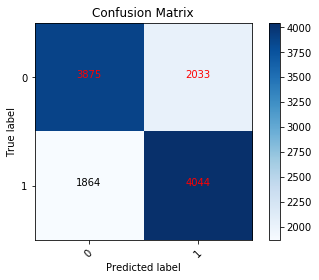

In [61]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cf,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cf.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
                 horizontalalignment="center",
                 color="red" if cf[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [62]:
from sklearn.metrics import roc_curve, auc
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/Gary/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
from sklearn.metrics import roc_curve, auc
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))

/Users/Gary/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.6575838903229114


/Users/Gary/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.6575838903229114


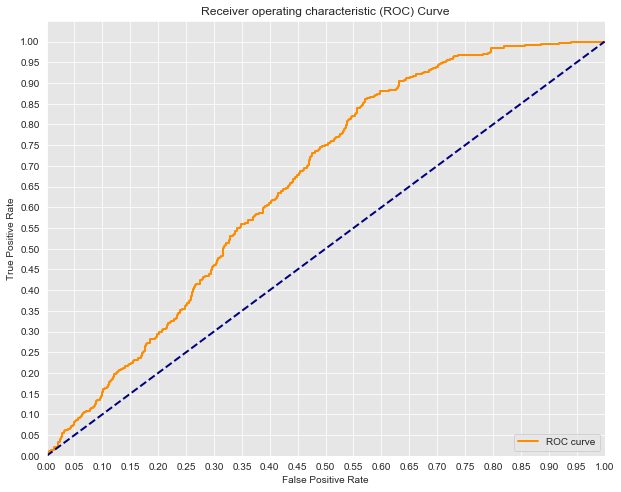

AUC: 0.6575838903229114


In [65]:
from sklearn.metrics import roc_curve, auc
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print('AUC: {}'.format(auc(fpr, tpr)))

In [66]:
import statsmodels.api as sm

model = sm.Logit(y_train_resampled, X_train_resampled)

model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.604921
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                11816
Model:                          Logit   Df Residuals:                    11795
Method:                           MLE   Df Model:                           20
Date:                Tue, 20 Aug 2019   Pseudo R-squ.:                  0.1273
Time:                        15:21:27   Log-Likelihood:                -7147.8
converged:                       True   LL-Null:                       -8190.2
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1522      0.017     -9.057      0.000      -0.185      -0.119
x2         -9.963e-06    3.3e-06     -3.023      0.003   -1.64e-05    -3.5e-06
x3            -0.3051      0.036     -8.438      0.000      -0.376      -0.234
x4             0.0354      0.015      2.396      0.017       0.006       0.064
x5             0.1590      0.020      7.889      0.000       0.120       0.199
x6            -0.1435      0.041     -3.491      0.000      -0.224      -0.063
x7          1.522e-05   9.42e-07     16.149      0.000    1.34e-05    1.71e-05
x8            -0.0065      0.038     -0.170      0.865      -0.082       0.069
x9            -0.4024      0.031    -12.786      0.000      -0.464      -0.341
x10            0.0030      0.001      3.289      0.001       0.001       0.005
x11            0.0098      0.002      4.810      0.000       0.006       0.014
x12            0.0006      0.001      0.780      0.435      -0.001       0.002
x13           -0.1315      0.024     -5.541      0.000      -0.178      -0.085
x14            0.0016      0.008      0.190      0.849      -0.015       0.018
x15           -1.0463      0.074    -14.105      0.000      -1.192      -0.901
x16            0.2291      0.023     10.027      0.000       0.184       0.274
x17           -0.7253      0.027    -26.604      0.000      -0.779      -0.672
x18           -0.2165      0.019    -11.122      0.000      -0.255      -0.178
x19            0.0009      0.000      7.065      0.000       0.001       0.001
x20            0.0134      0.010      1.300      0.194      -0.007       0.034
x21           -0.1521      0.037     -4.084      0.000      -0.225      -0.079
==============================================================================
"""

In [67]:
df3 = pd.read_csv('data.csv')
df3.head()


Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

## Logistic Regression with One Hot Encoded Variables

In [23]:
df3 = pd.read_csv('data.csv')
df3.columns = df3.columns.str.replace(' ','_')
df3.Response = df3.Response.apply(lambda x : 0 if x == 'No' else 1)
df3 = df3.drop(['Customer', 'State', 'Effective_To_Date'], axis = 1)




df3["Customer_Lifetime_Value"] = df3["Customer_Lifetime_Value"].round().astype(int)
df3['Total_Claim_Amount'] = df3['Total_Claim_Amount'].round().astype(int)
# Define New X and Y

df3 = pd.get_dummies(df3)


X = df3.drop('Response', axis = 1)

y = df3['Response']

df3.head()

Customer_Lifetime_Value  Response  Income  Monthly_Premium_Auto  \
0                     2764         0   56274                    69   
1                     6980         0       0                    94   
2                    12887         0   48767                   108   
3                     7646         0       0                   106   
4                     2814         0   43836                    73   

   Months_Since_Last_Claim  Months_Since_Policy_Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number_of_Open_Complaints  Number_of_Policies  Total_Claim_Amount  \
0                          0                   1                 385   
1                          0                   8                1131   
2                          0                   2                 566   
3                          0                   7                 530   
4                          0                   1                 138   

   Coverage_Basic  Coverage_Extended  Coverage_Premium  Education_Bachelor  \
0               1                  0                 0                   1   
1               0                  1                 0                   1   
2               0                  0                 1                   1   
3               1                  0                 0                   1   
4               1                  0                 0                   1   

   Education_College  Education_Doctor  Education_High School or Below  \
0                  0                 0                               0   
1                  0                 0                               0   
2                  0                 0                               0   
3                  0                 0                               0   
4                  0                 0                               0   

   Education_Master  EmploymentStatus_Disabled  EmploymentStatus_Employed  \
0                 0                          0                          1   
1                 0                          0                          0   
2                 0                          0                          1   
3                 0                          0                          0   
4                 0                          0                          1   

   EmploymentStatus_Medical Leave  EmploymentStatus_Retired  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   EmploymentStatus_Unemployed  Gender_F  Gender_M  Location_Code_Rural  \
0                            0         1         0                    0   
1                            1         1         0                    0   
2                            0         1         0                    0   
3                            1         0         1                    0   
4                            0         0         1                    1   

   Location_Code_Suburban  Location_Code_Urban  Marital_Status_Divorced  \
0                       1                    0                        0   
1                       1                    0                        0   
2                       1                    0                        0   
3                       1                    0                        0   
4                       0                    0                        0   

   Marital_Status_Married  Marital_Status_Single  Policy_Type_Corporate Auto  \
0                       1                   

**Try with different weights**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)#create train test split

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True, class_weight= {0:1, 1:2}, C = 1, penalty = 'l2')
model_log = logreg.fit(X_train, y_train)
model_log


/Users/Gary/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight={0: 1, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_hat_test = logreg.predict(X_test)
y_hat_train= logreg.predict(X_train)

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    5862
1     988
Name: Response, dtype: int64
0    0.855766
1    0.144234
Name: Response, dtype: float64


**With Parameter Class weight set to Balanced**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)#create train test split

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True, class_weight= 'balanced', C = 1, penalty = 'l2')
model_log = logreg.fit(X_train, y_train)
model_log

/Users/Gary/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_hat_test = logreg.predict(X_test)
y_hat_train= logreg.predict(X_train)

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    4923
1    1927
Name: Response, dtype: int64
0    0.718686
1    0.281314
Name: Response, dtype: float64


Ineffective at balancing classes.

**Let's Smote them to acheive a perfect balance**

In [28]:
from imblearn.over_sampling import SMOTE
print(y.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0    7826
1    1308
Name: Response, dtype: int64
1    5851
0    5851
dtype: int64


In [29]:
logreg = LogisticRegression(fit_intercept = True, class_weight= None, C = 1, penalty = 'l2')
model_log = logreg.fit(X_train_resampled, y_train_resampled)
model_log

/Users/Gary/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_hat_test = logreg.predict(X_test)
y_hat_train= logreg.predict(X_train_resampled)

residuals = np.abs(y_train_resampled - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    10057
1     1645
dtype: int64
0    0.859426
1    0.140574
dtype: float64


In [31]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_train_resampled, y_hat_train)
cf

cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]

array([[5481,  370],
       [1275, 4576]])

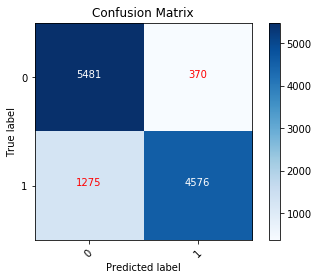

In [39]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cf,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cf.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
                 horizontalalignment="center",
                 color="White" if cf[i, j] > thresh else "red")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

Normalized confusion matrix
[[0.93676295 0.06323705]
 [0.21791147 0.78208853]]


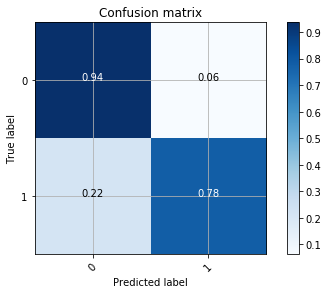

In [34]:
def plot_norm_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(None)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_norm_confusion_matrix(cf, set(y),
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues)

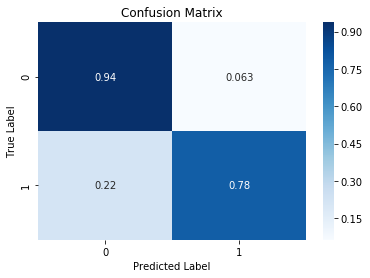

In [50]:
mm = cf
mm = mm.astype('float') / mm.sum(axis=1)

ax = plt.axes()
sns.heatmap(mm, annot = True, cmap="Blues", ax=ax)
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')


ax.set_title('Confusion Matrix')
plt.show()

/Users/Gary/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.7886182458727622


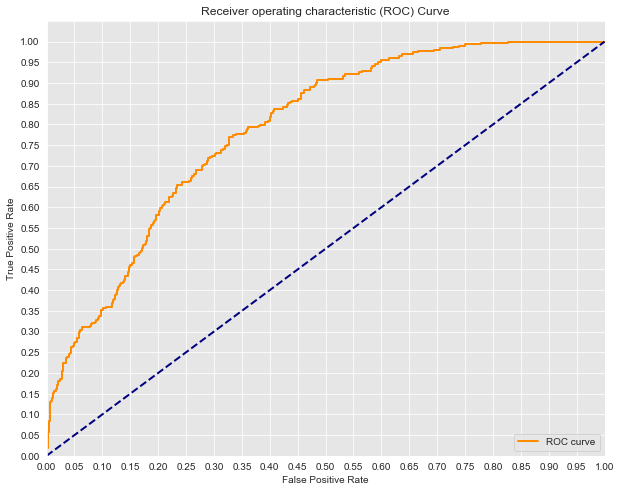

AUC: 0.7886182458727622


In [51]:
from sklearn.metrics import roc_curve, auc
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print('AUC: {}'.format(auc(fpr, tpr)))

Normalized confusion matrix
[[0.94525485 0.05474515]
 [0.22155483 0.77844517]]


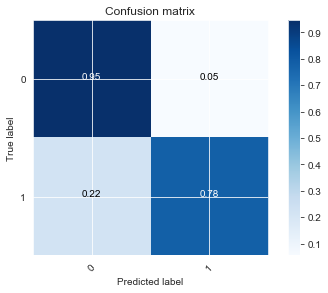